In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data .shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

# Text preprocessing

In [7]:
import re
import string

In [8]:
data['tweet'].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert upper case to lower case

In [9]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [10]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [11]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [12]:
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Remove punctuations

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [15]:
data['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

remove numbers

In [16]:
data['tweet']=data['tweet'].str.replace('\d+','',regex=True)

In [17]:
data['tweet'].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopdown

In [18]:
!pip install nltk

In [19]:
import nltk

In [20]:
nltk.download('stopwords',download_dir='statc/model')

[nltk_data] Downloading package stopwords to statc/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
with open('static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [22]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [24]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming

In [25]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [26]:
data['tweet']=data['tweet'].apply(lambda x:" ".join(ps.stem(x) for x in x.split() ))

In [27]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
from collections import Counter
vocab= Counter()

In [29]:
vocab

Counter()

In [30]:
for sentence in data ['tweet']:
    vocab.update(sentence.split())

In [31]:
len(vocab)

15949

In [32]:
data.shape

(7920, 3)

In [33]:
tokens =[key for key in vocab if vocab[key]>10]

In [34]:
len(tokens)

1145

In [35]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file= open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()
save_vocabulary(tokens,'static/model/vocabulary.txt')

# Divide dataset

In [36]:
x= data['tweet']
y=data['label']

In [37]:
!pip install scikit-learn

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [39]:
x_train.shape

(6336,)

In [40]:
x_test.shape

(1584,)

# Vectorization

In [41]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [42]:
vectorized_x_train = vectorizer(x_train, tokens)
vectorized_x_test = vectorizer(x_test, tokens)

In [43]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
y_train.value_counts()

label
0    4712
1    1624
Name: count, dtype: int64

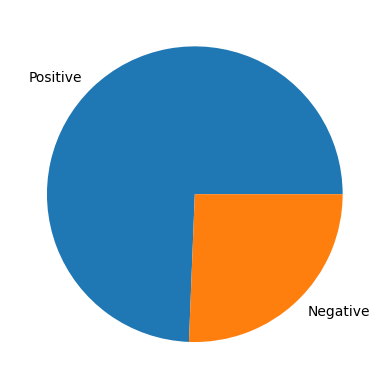

In [45]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

# Handle imbalanced dataset 

In [46]:
!pip install imbalanced-learn

In [47]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9424, 1145) (9424,)


In [48]:
y_train_smote.value_counts()

label
1    4712
0    4712
Name: count, dtype: int64

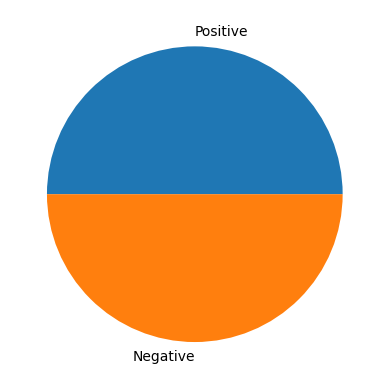

In [49]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

# Model training and Evaluation

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

# Logistic Regression

In [52]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote )

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.942
	Precision = 0.919
	Recall = 0.969
	F1-Score = 0.943
Testing Scores:
	Accuracy = 0.871
	Precision = 0.7
	Recall = 0.861
	F1-Score = 0.772


# Naive Bayse

In [53]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.911
	Precision = 0.874
	Recall = 0.961
	F1-Score = 0.915
Testing Scores:
	Accuracy = 0.869
	Precision = 0.679
	Recall = 0.92
	F1-Score = 0.781


# Decision Tree

In [54]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.834
	Precision = 0.66
	Recall = 0.714
	F1-Score = 0.686


 # Random Forest 


In [55]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.869
	Precision = 0.735
	Recall = 0.754
	F1-Score = 0.744


# Support Vector Machine 

In [ ]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)